<a href="https://colab.research.google.com/github/SahajTC/Augmented-Financial-Intelligence/blob/main/Model_training_on_fake_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
pip install yfinance prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 377 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
data = yf.download(tickers='BTC-USD', start='2020-01-01', end='2022-11-30', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [6]:
df = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df.head()

,ds,y
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


In [9]:
df.shape

(1064, 2)

In [105]:
k=df.shape[0]
sampl2=np.random.uniform(low=2,high=5,size=(k,))
sampl1=np.random.uniform(low=0,high=2,size=(k,))
sampl3=np.random.uniform(low=5,high=10,size=(k,))
sampl4=np.random.uniform(low=10,high=15,size=(k,))
sampl5=np.random.uniform(low=15,high=25,size=(k,))
sampl6=np.random.uniform(low=25,high=35,size=(k,))
sampl7=np.random.uniform(low=35,high=45,size=(k,))
sampl8=np.random.uniform(low=45,high=55,size=(k,))
sampl9=np.random.uniform(low=55,high=70,size=(k,))
sampl10=np.random.uniform(low=70,high=85,size=(k,))
sampl11=np.random.uniform(low=85,high=100,size=(k,))

In [106]:
df["0-2"]=sampl1
df["2-5"]=sampl2
df["5-10"]=sampl3
df["10-15"]=sampl4
df["15-25"]=sampl5
df["25-35"]=sampl6
df["35-45"]=sampl7
df["45-55"]=sampl8
df["55-70"]=sampl9
df["70-85"]=sampl10
df["85-100"]=sampl11

In [107]:
df.head()

,ds,y,0-2,2-5,5-10,10-15,15-25,25-35,35-45,45-55,55-70,70-85,85-100,Simple_Linear_processing
0,2020-01-01,7200.174316,1.807537,2.934368,7.949447,10.912382,23.350723,25.274683,37.698862,49.619096,55.815970,76.370296,89.275573,3920.328400
1,2020-01-02,6985.470215,0.713189,2.425485,8.569994,12.643827,23.188897,33.267990,35.500709,49.348562,67.568591,76.082239,85.899730,3839.327402
2,2020-01-03,7344.884277,0.399467,3.320876,8.117610,11.113646,15.194326,30.296506,44.506114,48.090561,57.343815,75.196463,88.071271,4003.065924
3,2020-01-04,7410.656738,0.053465,4.595256,7.921553,14.882995,15.157110,29.548254,41.875511,47.694106,55.124092,81.274548,99.665903,4062.749048
4,2020-01-05,7411.317383,0.393764,3.784742,7.937268,12.135322,21.862070,26.619513,43.938984,50.161179,55.653134,70.930894,98.843824,4037.430181


In [108]:
df["0-2"]=df["0-2"]/100
df["2-5"]=df["2-5"]/100
df["5-10"]=df["5-10"]/100
df["10-15"]=df["10-15"]/100
df["15-25"]=df["15-25"]/100
df["25-35"]=df["25-35"]/100
df["35-45"]=df["35-45"]/100
df["45-55"]=df["45-55"]/100
df["55-70"]=df["55-70"]/100
df["70-85"]=df["70-85"]/100
df["85-100"]=df["85-100"]/100


In [109]:
df["0-2"]=df["0-2"]+1
df["2-5"]=df["2-5"]+1
df["5-10"]=df["5-10"]+1
df["10-15"]=df["10-15"]+1
df["15-25"]=df["15-25"]+1
df["25-35"]=df["25-35"]+1
df["35-45"]=df["35-45"]+1
df["45-55"]=df["45-55"]+1
df["55-70"]=df["55-70"]+1
df["70-85"]=df["70-85"]+1
df["85-100"]=df["85-100"]+1

In [110]:
df.head()

,ds,y,0-2,2-5,5-10,10-15,15-25,25-35,35-45,45-55,55-70,70-85,85-100,Simple_Linear_processing
0,2020-01-01,7200.174316,1.018075,1.029344,1.079494,1.109124,1.233507,1.252747,1.376989,1.496191,1.558160,1.763703,1.892756,3920.328400
1,2020-01-02,6985.470215,1.007132,1.024255,1.085700,1.126438,1.231889,1.332680,1.355007,1.493486,1.675686,1.760822,1.858997,3839.327402
2,2020-01-03,7344.884277,1.003995,1.033209,1.081176,1.111136,1.151943,1.302965,1.445061,1.480906,1.573438,1.751965,1.880713,4003.065924
3,2020-01-04,7410.656738,1.000535,1.045953,1.079216,1.148830,1.151571,1.295483,1.418755,1.476941,1.551241,1.812745,1.996659,4062.749048
4,2020-01-05,7411.317383,1.003938,1.037847,1.079373,1.121353,1.218621,1.266195,1.439390,1.501612,1.556531,1.709309,1.988438,4037.430181


In [111]:
result = df[["0-2","2-5","5-10","10-15","15-25","25-35","35-45","45-55","55-70","70-85","85-100"]].multiply(df["y"], axis="index")

In [112]:
result.head()

,0-2,2-5,5-10,10-15,15-25,25-35,35-45,45-55,55-70,70-85,85-100
0,7330.320135,7411.453937,7772.548362,7985.884856,8881.467089,9019.995564,9914.558115,10772.835729,11219.021474,12698.968726,13628.171221
1,7035.289793,7154.901719,7584.124627,7868.700958,8605.323696,9309.395769,9465.361702,10432.699324,11705.454046,12300.172345,12985.970236
2,7374.224686,7588.798803,7941.113347,8161.168724,8460.889926,9570.127595,10613.806877,10877.080304,11556.721135,12867.977455,13813.617216
3,7414.618879,7751.195414,7997.695835,8513.584412,8533.898141,9600.376441,10513.907128,10945.103235,11495.714001,13433.634519,14796.554659
4,7440.500511,7691.816627,7999.573473,8310.704592,9031.584755,9384.173945,10667.774928,11128.921580,11535.947776,12668.231059,14736.946858


In [113]:
df["2-5"]=result["2-5"]
df["0-2"]=result["0-2"]
df["10-15"]=result["10-15"]
df["5-10"]=result["5-10"]
df["15-25"]=result["15-25"]
df["25-35"]=result["25-35"]
df["35-45"]=result["35-45"]
df["45-55"]=result["45-55"]
df["55-70"]=result["55-70"]
df["70-85"]=result["70-85"]
df["85-100"]=result["85-100"]

In [114]:
df_train = df[df['ds']<='2022-1-31']
df_test = df[df['ds']>'2022-1-31']

In [115]:
df_train.shape

(762, 14)

In [116]:
df_test.shape

(302, 14)

In [117]:
df_train.drop("ds",inplace=True,axis=1)
df_test.drop("ds",inplace=True,axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [119]:
df_train.head()

,y,0-2,2-5,5-10,10-15,15-25,25-35,35-45,45-55,55-70,70-85,85-100
0,7200.174316,7330.320135,7411.453937,7772.548362,7985.884856,8881.467089,9019.995564,9914.558115,10772.835729,11219.021474,12698.968726,13628.171221
1,6985.470215,7035.289793,7154.901719,7584.124627,7868.700958,8605.323696,9309.395769,9465.361702,10432.699324,11705.454046,12300.172345,12985.970236
2,7344.884277,7374.224686,7588.798803,7941.113347,8161.168724,8460.889926,9570.127595,10613.806877,10877.080304,11556.721135,12867.977455,13813.617216
3,7410.656738,7414.618879,7751.195414,7997.695835,8513.584412,8533.898141,9600.376441,10513.907128,10945.103235,11495.714001,13433.634519,14796.554659
4,7411.317383,7440.500511,7691.816627,7999.573473,8310.704592,9031.584755,9384.173945,10667.774928,11128.921580,11535.947776,12668.231059,14736.946858


In [120]:
X_train=df_train.drop("y", axis=1)
y_train=df_train.y
X_test=df_test.drop("y",axis=1)
y_test=df_test.y

In [68]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,mean_absolute_percentage_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Testing MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Test RMSLE": rmsle(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_test, y_test),
              "Training MAPE": mean_absolute_percentage_error(y_train, train_preds),
              "Testing MAPE": mean_absolute_percentage_error(y_test, test_preds),}
    return scores


In [121]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [600]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [600],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [122]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 600,
 'max_features': 'auto',
 'max_depth': 10}

In [123]:
ideal_model = RandomForestRegressor(n_estimators=rs_model.best_params_['n_estimators'],
                                    min_samples_leaf=rs_model.best_params_['min_samples_leaf'],
                                    min_samples_split=rs_model.best_params_['min_samples_split'],
                                    max_features=rs_model.best_params_['max_features'],
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3, n_estimators=50, n_jobs=-1)

In [124]:
show_scores(ideal_model)

{'Training MAE': 73.22242729960355,
 'Testing MAE': 207.1229018327112,
 'Training RMSLE': 0.0043751695509175285,
 'Test RMSLE': 0.011335201786599271,
 'Training R^2': 0.9999590411888026,
 'Test R^2': 0.999216388743298,
 'Training MAPE': 0.0026582517691461135,
 'Testing MAPE': 0.008228447592920787}

In [125]:
ideal_model.feature_importances_

array([0.18702626, 0.18275184, 0.0431021 , 0.04165961, 0.12067766,
       0.05815683, 0.00101422, 0.07033555, 0.18926116, 0.05294059,
       0.05307418])

In [126]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

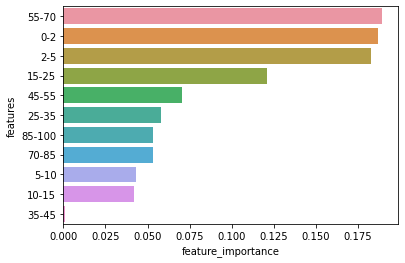

In [127]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [128]:
df_tmp=df

In [129]:
df_tmp["Simple_Linear_processing"]=((df["0-2"]/1.01)+(df["2-5"]/1.035)+(df["5-10"]/1.075)+(df["10-15"]/1.125)+(df["15-25"]/1.2)+(df["25-35"]/1.3)+df["35-45"]/1.4+df["45-55"]/1.5+df["55-70"]/1.625+df["70-85"]/1.725+df["85-100"]/1.925)/11

In [130]:
df_tmp.head()

,ds,y,0-2,2-5,5-10,10-15,15-25,25-35,35-45,45-55,55-70,70-85,85-100,Simple_Linear_processing
0,2020-01-01,7200.174316,7330.320135,7411.453937,7772.548362,7985.884856,8881.467089,9019.995564,9914.558115,10772.835729,11219.021474,12698.968726,13628.171221,7154.191975
1,2020-01-02,6985.470215,7035.289793,7154.901719,7584.124627,7868.700958,8605.323696,9309.395769,9465.361702,10432.699324,11705.454046,12300.172345,12985.970236,7005.101305
2,2020-01-03,7344.884277,7374.224686,7588.798803,7941.113347,8161.168724,8460.889926,9570.127595,10613.806877,10877.080304,11556.721135,12867.977455,13813.617216,7297.029630
3,2020-01-04,7410.656738,7414.618879,7751.195414,7997.695835,8513.584412,8533.898141,9600.376441,10513.907128,10945.103235,11495.714001,13433.634519,14796.554659,7426.291790
4,2020-01-05,7411.317383,7440.500511,7691.816627,7999.573473,8310.704592,9031.584755,9384.173945,10667.774928,11128.921580,11535.947776,12668.231059,14736.946858,7409.985060


In [131]:
mean_absolute_percentage_error(df_tmp["Simple_Linear_processing"],df_tmp["y"])

0.0050898340980518484

In [ ]:
result.shape

(2525, 6)

In [ ]:
X_train.head()

,0-2,2-5,5-10,10-15,15-25,25-35
0,315.215834,326.009073,332.272384,350.840688,392.620805,397.984748
1,316.019177,325.179687,343.744181,347.046030,380.675048,411.345998
2,281.797312,287.567506,309.084076,318.255586,348.861613,356.864095
3,266.431939,270.792776,279.448102,293.826811,321.983466,333.127819
4,274.876555,283.592427,300.774182,309.665854,339.119228,356.030006


In [132]:
df_tmp["model_preds"]=ideal_model.predict(result)

In [133]:
df_tmp.head()

,ds,y,0-2,2-5,5-10,10-15,15-25,25-35,35-45,45-55,55-70,70-85,85-100,Simple_Linear_processing,model_preds
0,2020-01-01,7200.174316,7330.320135,7411.453937,7772.548362,7985.884856,8881.467089,9019.995564,9914.558115,10772.835729,11219.021474,12698.968726,13628.171221,7154.191975,7191.512708
1,2020-01-02,6985.470215,7035.289793,7154.901719,7584.124627,7868.700958,8605.323696,9309.395769,9465.361702,10432.699324,11705.454046,12300.172345,12985.970236,7005.101305,6988.198872
2,2020-01-03,7344.884277,7374.224686,7588.798803,7941.113347,8161.168724,8460.889926,9570.127595,10613.806877,10877.080304,11556.721135,12867.977455,13813.617216,7297.029630,7341.499168
3,2020-01-04,7410.656738,7414.618879,7751.195414,7997.695835,8513.584412,8533.898141,9600.376441,10513.907128,10945.103235,11495.714001,13433.634519,14796.554659,7426.291790,7403.166741
4,2020-01-05,7411.317383,7440.500511,7691.816627,7999.573473,8310.704592,9031.584755,9384.173945,10667.774928,11128.921580,11535.947776,12668.231059,14736.946858,7409.985060,7382.114496


In [134]:
mean_absolute_percentage_error(df["model_preds"],df["y"])

0.0042457729784521675

In [135]:
show_scores(ideal_model)

{'Training MAE': 73.2224272996036,
 'Testing MAE': 207.1229018327112,
 'Training RMSLE': 0.0043751695509175285,
 'Test RMSLE': 0.011335201786599271,
 'Training R^2': 0.9999590411888026,
 'Test R^2': 0.999216388743298,
 'Training MAPE': 0.0026582517691461135,
 'Testing MAPE': 0.008228447592920787}

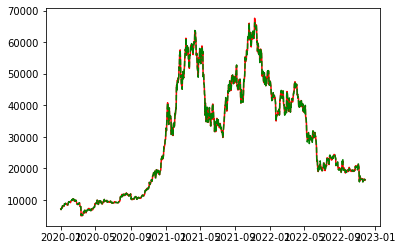

In [136]:
plt.plot(df_tmp["ds"],df_tmp["y"],'r',df_tmp["ds"],df_tmp["model_preds"],'--g');

Text(0.5, 1.0, 'Linear_Processing')

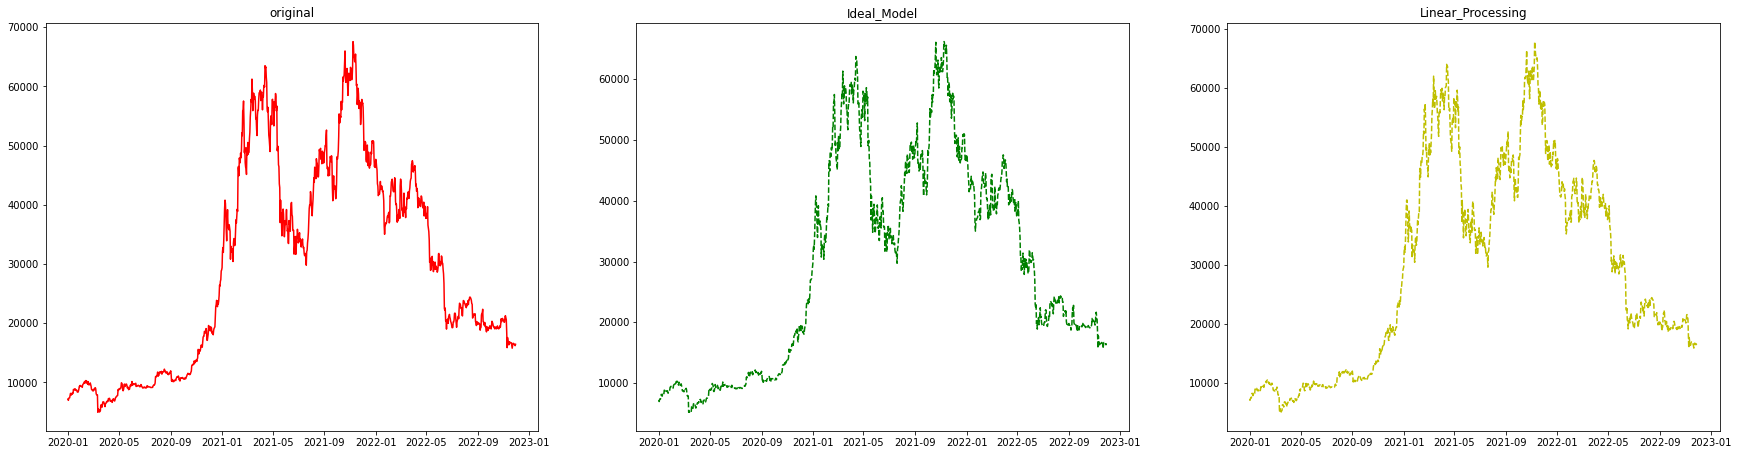

In [137]:
f, a = plt.subplots(1, 3)
f.set_figwidth(30)
f.set_figheight(7.5)
a[0].plot(df_tmp["ds"],df_tmp["y"],'r')
a[0].set_title("original")
a[1].plot(df_tmp["ds"],df_tmp["model_preds"],'--g')
a[1].set_title("Ideal_Model")
a[2].plot(df_tmp["ds"],df_tmp["Simple_Linear_processing"],'--y')
a[2].set_title("Linear_Processing")